In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

In [3]:
df_weather = pd.read_csv("data/weatherHistory.csv")

In [4]:
df_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
df_weather = df_weather.rename(columns =
{
     "Temperature (C)":"Temperature",
     'Apparent Temperature (C)':"Apparent Temperature",
     'Wind Speed (km/h)' : "Wind Speed",
     "Wind Bearing (degrees)" :"Wind Bearing",
     'Visibility (km)':'Visibility',
      'Pressure (millibars)': 'Pressure' 
}
)

In [7]:
df_weather.head(2)

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


# Data Cleaning

In [8]:
print(len(df_weather))
df_weather_copy = df_weather.drop_duplicates()
print(len(df_weather))

96453
96453


In [9]:
df_weather_copy.isna().sum()

Formatted Date            0
Summary                   0
Precip Type             517
Temperature               0
Apparent Temperature      0
Humidity                  0
Wind Speed                0
Wind Bearing              0
Visibility                0
Loud Cover                0
Pressure                  0
Daily Summary             0
dtype: int64

In [10]:
df_weather_copy["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

In [11]:
df_weather_copy["Precip Type"].isna().sum()

517

In [12]:
df_weather_copy = df_weather_copy.dropna()

In [13]:
df_weather_copy.head()

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [14]:
print(len(df_weather_copy))
df_weather_copy = df_weather_copy[df_weather_copy["Pressure"] != 0]
len(df_weather_copy)

95912


94624

In [15]:
# from  96453
# to    95912 
# to    94624 

In [16]:
df_weather_copy = df_weather_copy.drop(columns=["Loud Cover"])

In [17]:
len(df_weather_copy["Daily Summary"].unique())

214

In [18]:
len(df_weather_copy["Summary"].unique())

27

# Exploratory Data Analysis

In [19]:
df_weather_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,94624.0,11.954747,9.564560,-21.822222,4.655556,12.055556,18.851389,39.905556
Apparent Temperature,94624.0,10.882686,10.706324,-27.716667,2.300000,12.055556,18.851389,39.344444
Humidity,94624.0,0.734909,0.195838,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed,94624.0,10.780227,6.899016,0.000000,5.796000,9.909550,14.103600,63.852600
Wind Bearing,94624.0,187.425273,107.400837,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility,94624.0,10.397271,4.168015,0.000000,8.420300,10.046400,14.908600,16.100000
Pressure,94624.0,1016.801563,7.770814,973.780000,1012.110000,1016.530000,1021.130000,1046.380000


## 1 - Univariat

#### out comes from univariate
+ removed all zero pressure
+ removed loud cover (all values are zeros)
+ wind bearing has the peaks distribution
+ wind speed - visiblity need some preprocessing 

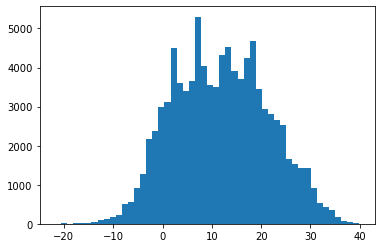

In [20]:
_ = plt.hist(df_weather_copy["Temperature"],bins=50)

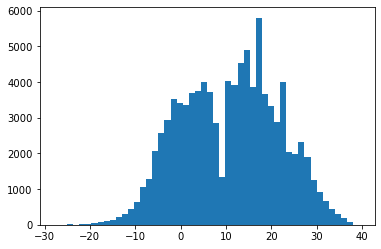

In [21]:
_ = plt.hist(df_weather_copy["Apparent Temperature"],bins=50)

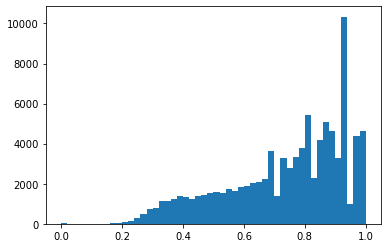

In [22]:
# _ = plt.hist(np.exp(df_weather["Humidity"]).replace(np.NINF,0),bins=50)
_ = plt.hist(df_weather_copy["Humidity"],bins=50)

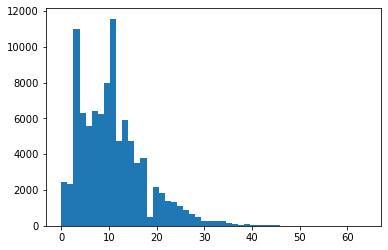

In [23]:
# _ = plt.hist(np.exp(df_weather["Humidity"]).replace(np.NINF,0),bins=50)

_ = plt.hist(df_weather_copy["Wind Speed"],bins=50)

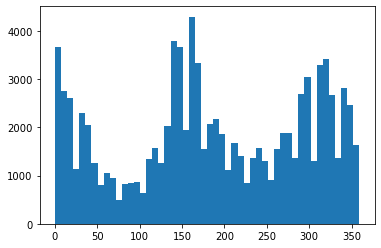

In [24]:
_ = plt.hist(df_weather_copy["Wind Bearing"],bins=50)

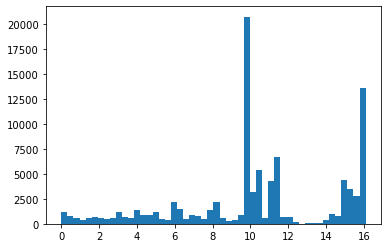

In [25]:
_ = plt.hist(df_weather_copy["Visibility"],bins=50)

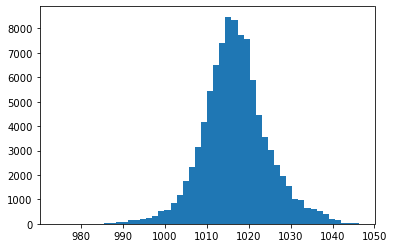

In [26]:
_ = plt.hist(df_weather_copy["Pressure"],bins=50)

# 2 - Bivariate
#### Bivariate exploration outcomes
+ precip type is creating well separated patterns
+ apparent temp is very corrolated with temp 
+ there is no apparent pattern in any of the other features

In [27]:
# sns.pairplot(data=df_weather_copy,x_vars=df_weather_copy.columns,
# y_vars=["Apparent Temperature"], size= 8)

In [28]:
df_weather_copy.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing',
       'Visibility', 'Pressure', 'Daily Summary'],
      dtype='object')

In [29]:
# plt.xticks(rotation=90)
# sns.scatterplot(data=df_weather_copy,
#                 x="Summary",
#                 y="Visibility")

In [30]:
# plt.xticks(rotation=90)
# sns.scatterplot(data=df_weather_copy,
#                 x="Pressure",
#                 y="Temperature")

# 2 - MultiVariate
#### MultiVariate exploration outcomes


In [31]:
# plt.xticks(rotation=90)
# sns.scatterplot(data=df_weather_copy,
#                 x="Temperature",
#                 y="Apparent Temperature",
#                 hue= "Summary")
# # plt.legend(loc='upper left')


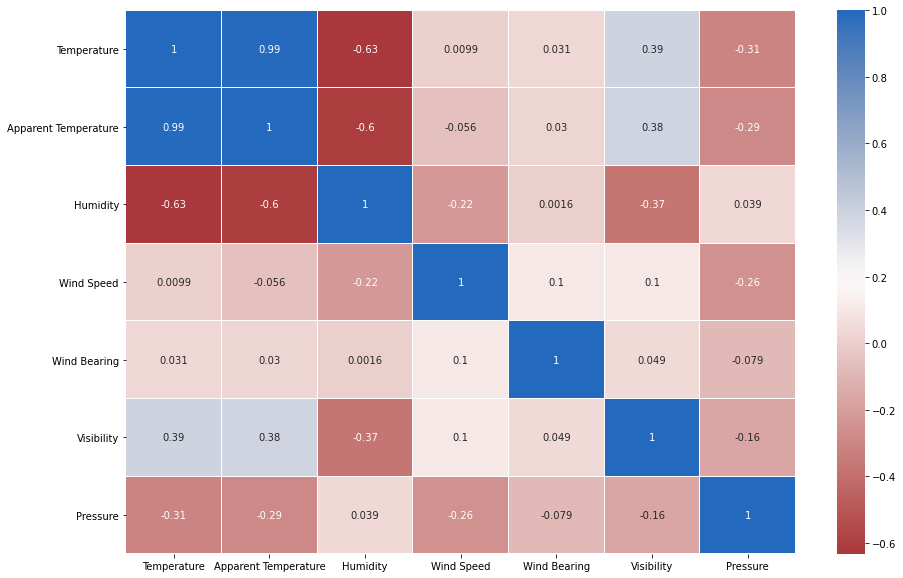

In [32]:
corrMatrix = df_weather_copy.corr()
plt.subplots(figsize=(15,10))  
sns.heatmap(corrMatrix, cmap='vlag_r', linewidths=.1, annot=True)
plt.show()

# ---------------------------------------------------------------------------------------------------------

In [33]:
def encode_columns(df_data):
    df_data["Precip Type"] = df_data["Precip Type"].apply(lambda x: 1 if x == "rain" else 0)
    
    fe =  df_data.groupby("Summary").size() / len(df_data)
    df_data["Summary"] = df_data["Summary"].map(fe)
    
    fe =  df_data.groupby("Daily Summary").size() / len(df_data)
    df_data["Daily Summary"] = df_data["Daily Summary"].map(fe)
    
    return df_data

In [34]:
df_weather_copy = encode_columns(df_weather_copy)

# Creating model

In [35]:
df_weather_copy.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature',
       'Apparent Temperature', 'Humidity', 'Wind Speed', 'Wind Bearing',
       'Visibility', 'Pressure', 'Daily Summary'],
      dtype='object')

In [36]:
selected_features = [
#'Formatted Date',
'Summary',
'Precip Type',
'Temperature',
'Humidity',
'Wind Speed',
'Wind Bearing',
'Visibility',
'Pressure',
#'Daily Summary'
]

In [119]:
X_train, X_test, y_train, y_test =  train_test_split(df_weather_copy[selected_features], df_weather_copy["Apparent Temperature"], test_size=.3)

In [38]:
#Multiple regression,
#SVR regression,
#Polynomial regression

# Multiple regression

In [39]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.990085455046244

# SVR regression

In [40]:
#clf_svm = make_pipeline(PowerTransformer(), SVR(gamma=.15,C = .9,kernel = 'rbf'))
#clf_svm.fit(X_train, y_train) 
# y_pred = clf_svm.predict(X_test)
# r2_score(y_test,y_pred)
# this is better

 # Polynomial regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(X_train)
print(xp.shape)

model = sm.OLS(y_train, xp).fit()
# ypred = model.predict(xp) 
# ypred.shape

(66236, 165)


In [42]:
xp = polynomial_features.transform(X_test)
y_pred = model.predict(xp) 
r2_score(y_test,y_pred)

0.998016108154232

# Implemented Linear Regression

In [129]:
class linear_regression_multi:
    def __init__(self):
        self.lst_thetas = []
        pass

    def fit(self,input_matrix,outputVector,alpha=.1,n_iter= 10000):
        input_matrix = np.concatenate((np.reshape(np.ones(len(input_matrix)),(-1,1)), input_matrix),axis = 1)
        m = len(input_matrix)
        lst_thetas = np.zeros(len(input_matrix[0])) 
        learning_Rate = alpha
        loss_vals = []
        for i in range(n_iter):
            
            #gettin the predicted data vector 
            predict_data_vector = np.dot(input_matrix,lst_thetas)
            
            #GRADIENT VECTOR
            grad_vector = np.dot(input_matrix.T,(predict_data_vector - outputVector))/m
    
            #updating thetas
            lst_thetas = lst_thetas -  learning_Rate* grad_vector
            
        print(lst_thetas)
        print("done")
        self.lst_thetas = lst_thetas
        
        #return lst_thetas 
    
    def predict(self, input_matrix):
        input_matrix = np.concatenate((np.reshape(np.ones(len(input_matrix)),(-1,1)), input_matrix),axis = 1)
        predicted_vals  = input_matrix @ self.lst_thetas
        return predicted_vals

##  0.8351437161321522    without scalling  .000001  learning rate

In [128]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
lr_implemented = linear_regression_multi()
lr_implemented.fit(X_train, y_train)

X_test = StandardScaler().fit_transform(X_test)

y_pred = lr_implemented.predict(X_test)

r2_score(y_test,y_pred)

[10.88892177 -0.03435522  0.15257998 10.73127939  0.19838979 -0.64536361
  0.06299846 -0.01168612  0.12096774]
done


0.9899584972023903

# This is really good what scaling did to the r2_score
# From .83  to .98  